In [120]:
import folium
from folium import plugins
import ipywidgets
import geocoder

import numpy as np 
import pandas as pd

from vega_datasets import data as vds
from branca.element import Figure

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CO2 Emissions per Country from 1990-2019

In [41]:
Co2 = pd.read_csv('CO2_emission.csv')
Co2

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2019.1
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,...,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,0.159824
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,...,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,0.792137
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,1.692248
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,...,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217,6.481217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Samoa,WSM,East Asia & Pacific,CO2 emissions (metric tons per capita),0.552836,0.609756,0.604266,0.658221,0.592807,0.705675,...,1.066843,1.057703,1.048702,1.092498,1.240246,1.542099,1.586830,1.478626,1.522124,1.522124
211,"Yemen, Rep.",YEM,Middle East & North Africa,CO2 emissions (metric tons per capita),0.567037,0.690937,0.704793,0.627105,0.653256,0.706081,...,0.963978,0.858491,1.106688,1.062211,0.511362,0.399364,0.359622,0.341068,0.380633,0.380633
212,South Africa,ZAF,Sub-Saharan Africa,CO2 emissions (metric tons per capita),6.729799,6.424622,6.175430,6.219194,6.215847,6.378790,...,7.869816,8.077958,8.138264,8.212241,7.669938,7.563739,7.641675,7.515679,7.507736,7.507736
213,Zambia,ZMB,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.340930,0.349232,0.337224,0.289956,0.241270,0.234153,...,0.217497,0.278601,0.284058,0.304550,0.312355,0.325115,0.404068,0.445489,0.380717,0.380717


In [42]:
carbon_df= Co2.fillna(0)

In [44]:
#add a column for total emissions
carbon_df['Total Emissions'] = Co2.sum(axis=1)
carbon_df.head()

/var/folders/ds/5nt6qnxj0tj3npycypwl5nch0000gn/T/ipykernel_1832/4184215063.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  carbon_df['Total Emissions'] = Co2.sum(axis=1)


,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2019.1,Total Emissions
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,...,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,0.159824,3.666681
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,...,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,0.792137,27.806570
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,1.692248,39.216741
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,...,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217,6.481217,209.918398


# Histogram of total emissions 

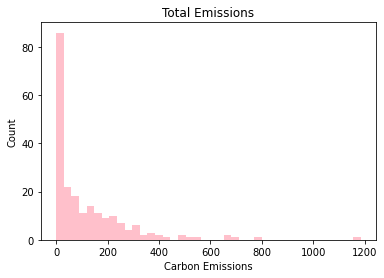

In [151]:
#most emissions are low 
plt.hist(carbon_df['Total Emissions'], bins = 40, color ='pink')
plt.xlabel("Carbon Emissions")
plt.ylabel("Count")
plt.title("Total Emissions")
plt.show()

In [137]:
country_map = carbon_df[['Country Name','Total Emissions']].sort_values('Total Emissions',ascending=False)[:8]
country_map

,Country Name,Total Emissions
162,Qatar,1183.479665
5,United Arab Emirates,771.017886
19,Bahrain,694.734161
105,Kuwait,668.307522
115,Luxembourg,662.097055
202,United States,559.215426
10,Australia,520.049076
28,Brunei Darussalam,497.990205


In [139]:
country_map['Long']= [50.657289,51.711914,50.307386,46.9752658,5.5729138,-113.7087316,115.1915117,114.1594542]

In [138]:
country_map['Lat']= [25.3430486, 24.3374985,25.9406805,29.3129026,49.8139485,36.2127171,-25.0281976,4.5500052]

In [140]:
country_map

,Country Name,Total Emissions,Lat,Long
162,Qatar,1183.479665,25.343049,50.657289
5,United Arab Emirates,771.017886,24.337498,51.711914
19,Bahrain,694.734161,25.940680,50.307386
105,Kuwait,668.307522,29.312903,46.975266
115,Luxembourg,662.097055,49.813949,5.572914
202,United States,559.215426,36.212717,-113.708732
10,Australia,520.049076,-25.028198,115.191512
28,Brunei Darussalam,497.990205,4.550005,114.159454


In [99]:
#Total Emissions per Country
country_emissions = carbon_df[['Country Name','Total Emissions']].sort_values('Total Emissions',ascending=False)[:25]
country_emissions

,Country Name,Total Emissions
162,Qatar,1183.479665
5,United Arab Emirates,771.017886
19,Bahrain,694.734161
105,Kuwait,668.307522
115,Luxembourg,662.097055
202,United States,559.215426
10,Australia,520.049076
28,Brunei Darussalam,497.990205
32,Canada,493.065113
166,Saudi Arabia,428.619004


In [147]:
mapa= folium.Map(location=[31, -89], zoom_start=5)

for indice, fila in country_map.iterrows():
    folium.Marker(
        location=[fila.loc['Lat'],fila.loc['Long']],
        popup=f"{fila.loc['Country Name']}",
        tooltip= 'click'
    ).add_to(mapa)

mapa


In [100]:
#sns.pairplot(, hue ='country_code')

# Top 25 countries with the most emissions

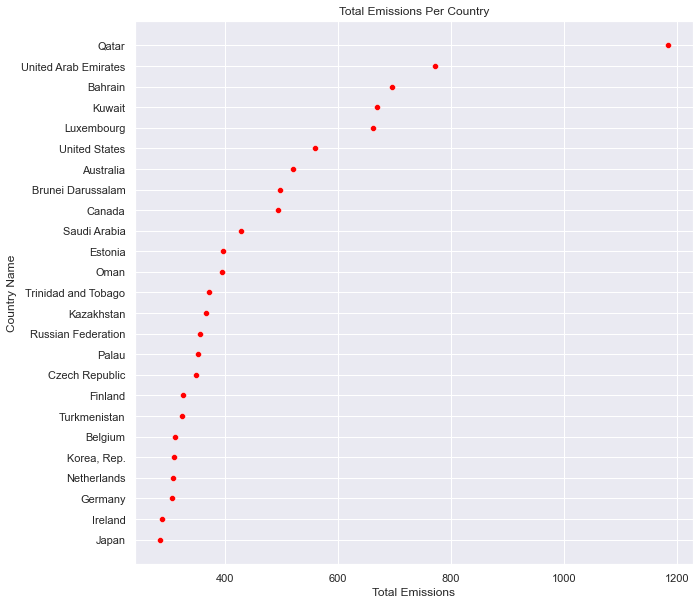

In [223]:
p= sns.scatterplot(x ='Total Emissions', y='Country Name' , data = country_emissions, color='red')
p.set(title = "Total Emissions Per Country")
sns.set(rc = {'figure.figsize':(2,2)})

In [84]:
#average emissions per country
Av_emissions=carbon_df.pivot_table(index=['country_code'], values = ['Total Emissions'])
Av_emissions

,Total Emissions
country_code,
ABW,0.000000
AFG,3.666681
AGO,27.806570
ALB,39.216741
AND,209.918398
...,...
WSM,31.183269
YEM,24.537966
ZAF,226.951352


# Box plot of the total emissions

most values are quite low compared to the highest value

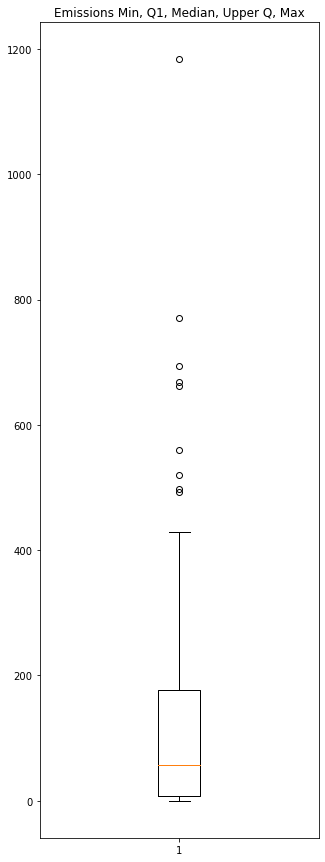

In [129]:
fig = plt.figure(figsize =(5, 15))
plt.boxplot(carbon_df['Total Emissions'])
plt.title("Emissions Min, Q1, Median, Upper Q, Max")
plt.show()

In [70]:
Av_emissions.nsmallest(n=25, columns=['Total Emissions'])

,Total Emissions
Country Name,
American Samoa,0.000000
Aruba,0.000000
Bermuda,0.000000
British Virgin Islands,0.000000
Cayman Islands,0.000000
Curacao,0.000000
Faroe Islands,0.000000
French Polynesia,0.000000
Gibraltar,0.000000


In [61]:
maxmin1990= Co2.pivot_table(index=['Country Name'], values = ('1990'), aggfunc=(np.median, np.min, np.max, np.std))
maxmin1990

,amax,amin,median
Country Name,,,
Afghanistan,0.191745,0.191745,0.191745
Albania,1.819542,1.819542,1.819542
Algeria,2.443430,2.443430,2.443430
Andorra,7.521832,7.521832,7.521832
Angola,0.553662,0.553662,0.553662
...,...,...,...
"Venezuela, RB",5.176577,5.176577,5.176577
Vietnam,0.284311,0.284311,0.284311
"Yemen, Rep.",0.567037,0.567037,0.567037


In [60]:
maxmin2019 = Co2.pivot_table(index=['Country Name'], values = ('2019.1'), aggfunc=(np.median, np.min, np.max, np.std))
maxmin2019

,amax,amin,median
Country Name,,,
Afghanistan,0.159824,0.159824,0.159824
Albania,1.692248,1.692248,1.692248
Algeria,3.977650,3.977650,3.977650
Andorra,6.481217,6.481217,6.481217
Angola,0.792137,0.792137,0.792137
...,...,...,...
"Venezuela, RB",3.939566,3.939566,3.939566
Vietnam,3.488313,3.488313,3.488313
"Yemen, Rep.",0.380633,0.380633,0.380633


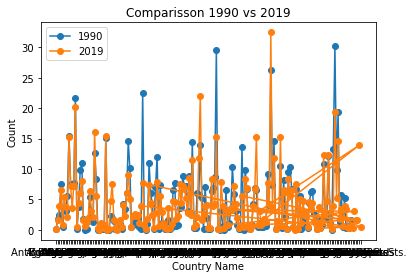

In [172]:
plt.plot(maxmin1990.index, maxmin1990['median'], '-o', label='1990')
plt.plot(maxmin2019.index, maxmin2019['median'],'-o', label='2019')

plt.xlabel("Country Name")
plt.ylabel("Count")
plt.title("Comparisson 1990 vs 2019")
plt.legend()

plt.show()

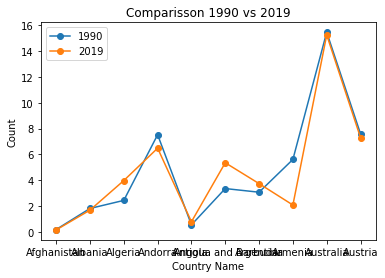

In [171]:
plt.plot(maxmin1990.index[:10], maxmin1990['median'][:10], '-o', label='1990')
plt.plot(maxmin2019.index[:10], maxmin2019['median'][:10],'-o', label='2019')

plt.xlabel("Country Name")
plt.ylabel("Count")
plt.title("Comparisson 1990 vs 2019")
plt.legend()

plt.show()

In [188]:
area1990 = carbon_df.groupby('Region').sum()[['1990']]
area1990

,1990
Region,
East Asia & Pacific,98.373009
Europe & Central Asia,426.580142
Latin America & Caribbean,73.863953
Middle East & North Africa,151.704781
North America,34.556236
South Asia,2.636176
Sub-Saharan Africa,27.118997


In [189]:
area2019 = carbon_df.groupby('Region').sum()[['2019']]
area2019

,2019
Region,
East Asia & Pacific,140.142667
Europe & Central Asia,286.244383
Latin America & Caribbean,100.148730
Middle East & North Africa,175.104550
North America,30.104023
South Asia,10.304685
Sub-Saharan Africa,43.942360


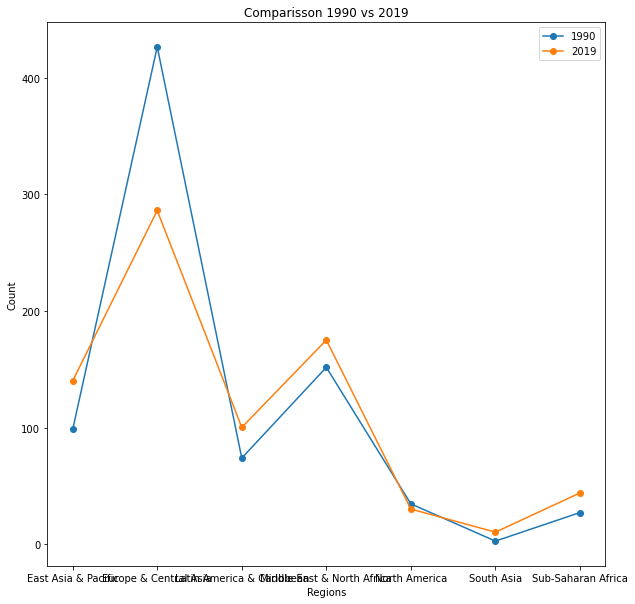

In [209]:
plt.plot(area1990.index, area1990['1990'], '-o', label='1990')
plt.plot(area2019.index, area2019['2019'],'-o', label='2019')

plt.xlabel("Regions")
plt.ylabel("Count")
plt.title("Comparisson 1990 vs 2019")
plt.legend()

plt.rcParams['figure.figsize'] = [2, 2]

plt.show()

In [115]:
latam =carbon_df[carbon_df['Region']== 'Latin America & Caribbean'].sort_values('Total Emissions',ascending=False)[:25]
latam

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2019.1,Total Emissions
194,Trinidad and Tobago,TTO,Latin America & Caribbean,CO2 emissions (metric tons per capita),10.768794,10.617456,10.633266,8.620100,7.034662,6.872907,...,16.002213,16.406787,16.178083,15.565571,13.291588,13.185845,12.792831,12.322855,12.322855,372.039375
20,"Bahamas, The",BHS,Latin America & Caribbean,CO2 emissions (metric tons per capita),7.649467,7.815882,9.660637,7.710328,7.504106,7.852123,...,9.763986,7.653297,6.799325,5.905933,5.397925,5.684363,7.260752,7.291661,7.291661,234.504362
205,"Venezuela, RB",VEN,Latin America & Caribbean,CO2 emissions (metric tons per capita),5.176577,5.025300,5.015640,5.109697,4.960755,5.199925,...,6.169104,6.058551,5.966121,5.422876,5.060760,4.789392,4.574011,3.939566,3.939566,164.029642
9,Antigua and Barbuda,ATG,Latin America & Caribbean,CO2 emissions (metric tons per capita),3.358227,3.472058,4.498984,3.800721,3.720183,3.931733,...,7.742763,5.136051,5.185713,5.236665,5.289886,5.239717,5.296940,5.354476,5.354476,162.534883
27,Barbados,BRB,Latin America & Caribbean,CO2 emissions (metric tons per capita),3.755753,3.741715,4.488569,3.789759,3.888362,4.023237,...,7.472735,5.065179,4.458878,4.451033,4.513677,4.122573,4.325984,4.355082,4.355082,159.233988
103,St. Kitts and Nevis,KNA,Latin America & Caribbean,CO2 emissions (metric tons per capita),2.732240,2.724053,3.686319,3.402931,3.604210,3.564893,...,6.816223,4.570021,4.529699,4.687134,4.648550,4.612191,4.767535,4.731801,4.731801,148.625293
178,Suriname,SUR,Latin America & Caribbean,CO2 emissions (metric tons per capita),4.343866,4.963572,4.873318,4.812769,4.757538,4.730101,...,4.508108,4.184215,4.735413,4.864648,5.222320,4.382113,3.836892,4.558254,4.558254,123.669111
124,Mexico,MEX,Latin America & Caribbean,CO2 emissions (metric tons per capita),3.211460,3.367924,3.349751,3.392592,3.621485,3.347469,...,4.147973,4.003630,3.840634,3.870317,3.837647,3.779372,3.586395,3.521600,3.521600,116.981913
6,Argentina,ARG,Latin America & Caribbean,CO2 emissions (metric tons per capita),3.075541,3.202031,3.218974,3.245795,3.252945,3.241342,...,4.264224,4.342115,4.209096,4.301914,4.201846,4.071308,3.975772,3.740650,3.740650,115.774743
34,Chile,CHL,Latin America & Caribbean,CO2 emissions (metric tons per capita),2.299125,2.171133,2.209942,2.317688,2.515822,2.709851,...,4.506229,4.723555,4.311061,4.576124,4.749830,4.714020,4.624338,4.821118,4.821118,113.148599


In [104]:
len(latam)

42

In [116]:
latamgroup = latam.groupby('Country Name').sum()['Total Emissions'].reset_index()

# Top 25 latin american & carribean countries with the most emissions

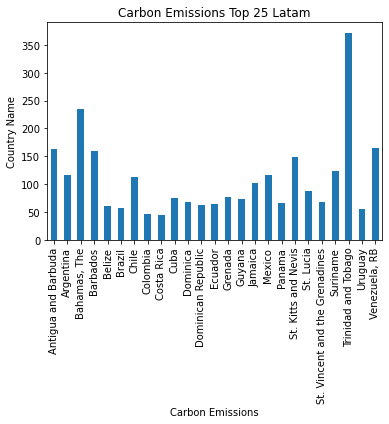

In [118]:
#calculate sum of values by group
df_groups = latam.groupby(['Country Name'])['Total Emissions'].sum()

#create bar plot by group
df_groups.plot(kind='bar')

plt.xlabel("Carbon Emissions")
plt.ylabel("Country Name")
plt.title("Carbon Emissions Top 25 Latam")
plt.show()

Conclusions:
- there have always been Co2 emissions, just now people are starting to worry
- there a focused countries that need to make a change
- paises petroleras relacion a C02